In [2]:
from sympy import *
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 10, 8

AbstractMatrix::Add


5*n**2 + 4*n + 2

AbstractMatrix::Mul


4*n**3 + 5*n**2 + 4*n + 2

addQuarter


8*n**2 + 4*n + 2

takeQuarter


7*n**2 + 4*n + 2

clear


7*n**2 + 4*n + 2

recMul при n > M


317*n**2 + 188*n + 150

recMul при n == M


4*n**3 + 5*n**2 + 4*n + 4


M = 32
Рекурентное соотношение - функция сложности от максимальной глубины рекурсии:


Eq(T(h), 317*2**(2*h)/4 + 94*2**h + 7*T(h - 1) + 150)

Eq(T(log(32)), 136324)

Функция сложности от N:


Eq(T(N), 3686323*7**(log(N)/log(2))/252105 - 317*N**2/3 - 188*N/5 - 25)

Эта же функция в виде строки:
3686323*7**(log(N)/log(2))/252105 - 317*N**2/3 - 188*N/5 - 25
Функция сложности для тривиального алгоритма в виде строки:
4*n**3 + 5*n**2 + 4*n + 2

График функции для Штрассена


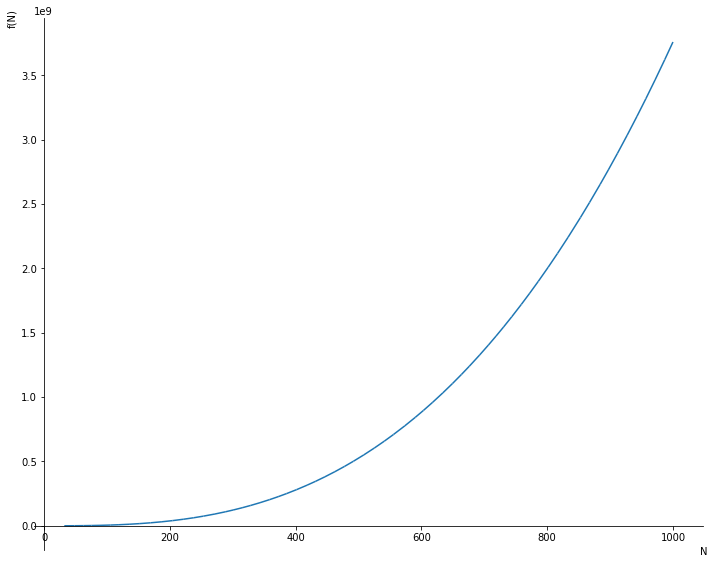

In [23]:
n, d, h, N, M = symbols('n, d, h, N, M', integer=True)
T = Function('T')

#AbstractMatrix::Add
T_f1 = (1 + (n + 1) + n) + n * ((1 + (n + 1) + n) + n * 3)
print("AbstractMatrix::Add")
display(simplify(T_f1))

#AbstractMatrix::Mul
T_f2 = (1 + (n + 1) + n) + n * ((1 + (n + 1) + n) + n * (1 + (1 + (n + 1) + n) + n * 2))
print("AbstractMatrix::Mul")
display(simplify(T_f2))
T_f2 = simplify(T_f2)

#getTempMatrixByIndex (не используется в расчете)
T_f3 = 4 + (d+1) + d * (5 + 1 + 1) + 2 + 8

#addQuarter
T_f4 = (1 + (n + 1) + n) + n * ((1 + (n + 1) + n) + n * 6)
print("addQuarter")
display(simplify(T_f4))

#takeQuarter
T_f5 = (1 + (n + 1) + n) + n * ((1 + (n + 1) + n) + n * 5)
print("takeQuarter")
display(simplify(T_f5))

#clear
T_f6 = (1 + (n + 1) + n) + n * ((1 + (n + 1) + n) + n * 1)
print("clear")
display(simplify(T_f5))

#recMul n > m
T_F1 = 3 + 1 + 7 + 10 * T_f1 + 3 * T_f3 + 12 * T_f4 + 24 * T_f5 + T_f6
T_F1 = T_F1.subs(d, 0)
print("recMul при n > M")
display(simplify(T_F1))

#recMul n <= m
T_F2 = 2 + T_f2
print("recMul при n == M")
display(simplify(T_F2))


M0 = 32

print("\nM = " + str(M0))
f = 7 * T(h - 1) + T_F1.subs(n, 2 ** h / 2)
f = simplify(f)
print("Рекурентное соотношение - функция сложности от максимальной глубины рекурсии:")
display(Eq(T(h), f))
display(Eq(T(log(M0)), T_F2.subs(n, M0)))
sol = rsolve(T(h) - f, T(h), {T(log(M0, 2)):T_F2.subs(n, M0)})

formula = sol.subs(h, log(N, 2))
print("Функция сложности от N:")
display(Eq(T(N), formula))

print("Эта же функция в виде строки:")
print(formula)

print("Функция сложности для тривиального алгоритма в виде строки:")
print(T_f2)

print("\nГрафик функции для Штрассена")
plot(formula, (N, 32, 1000))

Сравнение


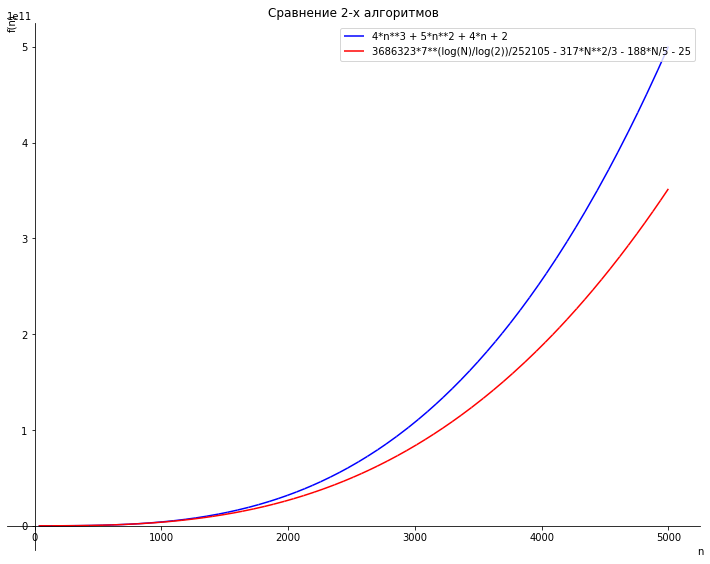

4*n**3 + 5*n**2 + 4*n + 2


In [46]:
print("Сравнение")

p1 = plot(simplify(T_f2), (n, 32, 5000), line_color='b', legend=1, title='Сравнение 2-х алгоритмов', show = False)
p2 = plot(formula, (N, 32, 5000), line_color='r', show = False)
p1.append(p2[0])
p1.show()
print(T_f2)

In [25]:
print("Тривиальный (N = 600)")
C = symbols("C")
eq = T_f2 * C - 11287.989500
display(Eq(eq, 0))
eq = eq.subs(n, 250)
display(Eq(n, 600))
C_0 = solve(eq, C)
print("Время одной операции (в секундах): ")
t_op = C_0[0] / 1000
display(Eq(C, t_op))
print("Частота процессора (в мГц): ")
display(1 / t_op / 1000000)

Тривиальный (N = 600)


Eq(C*(4*n**3 + 5*n**2 + 4*n + 2) - 11287.9895, 0)

Eq(n, 600)

Время одной операции (в секундах): 


Eq(C, 1.79706418852431e-7)

Частота процессора (в мГц): 


5.56463150501690

In [21]:
print("Штрассен (N = 250)")
eq = formula * C - 577.798500
display(Eq(eq, 0))
eq = eq.subs(N, 250)
display(Eq(N, 250))
C_0 = solve(eq, C)
print("Время одной операции (в секундах): ")
t_op = C_0[0] / 1000
display(Eq(C, t_op))
print("Частота процессора (в мГц): ")
display(1 / t_op / 1000000)

Штрассен (N = 250)


Eq(C*(3686323*7**(log(N)/log(2))/252105 - 317*N**2/3 - 188*N/5 - 25) - 577.7985, 0)

Eq(N, 250)

Время одной операции (в секундах): 


Eq(C, 7.99712945155365e-9)

Частота процессора (в мГц): 


125.044868419096